In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Chip data file names
chip_1 = "Chip_number_1_2024_03_20a.csv"
chip_3 = "Chip_number_3_2024_03_20a.csv"

In [3]:
# Create dataframes from chip data
c1 = pd.read_csv(chip_1)
c3 = pd.read_csv(chip_3)

#### Raw data put into a dataframe object:

In [4]:
c1

,R_ohms,I_amp,V_volts
0,0,0.004,0.006
1,1,0.004,0.008
2,2,0.004,0.012
3,3,0.003,0.014
4,4,0.003,0.018
5,5,0.003,0.02
6,6,0.003,0.023
7,7,0.003,0.026
8,8,0.003,0.029
9,9,0.003,0.032


##### Note: There are NaN rows along with some additional information in the csv that needs to be removed for easier manipulation of the dataframe.

In [5]:
# Pull additional info from chip data (manual, can be automated)
c1_short = 0.032 #amps
c1_inf = 0.394 #volts
c1_area = 4.0 #sq cm

c3_short = 0 #tbd, amps
c3_inf = 0.348 #volts
c3_area = 6.250 #sq cm

In [6]:
# Remove empty rows from chip data (manual, can also be automated by end indexing off first NaN value for R_ohms)
c1 = c1[:27]
c3 = c3[:24]

In [7]:
# Convert volt data to floats
c1['V_volts'] = c1['V_volts'].astype('float')
c3['V_volts'] = c3['V_volts'].astype('float')

/var/folders/nw/8yyyyp8n70vbplhdsylyqs8c0000gn/T/ipykernel_16133/3848038484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1['V_volts'] = c1['V_volts'].astype('float')


In [8]:
# Add Power Calculation to both chip datasets
c1['P_joules'] = c1['I_amp'] * c1['V_volts']
c3['P_joules'] = c3['I_amp'] * c3['V_volts']

/var/folders/nw/8yyyyp8n70vbplhdsylyqs8c0000gn/T/ipykernel_16133/2940277642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1['P_joules'] = c1['I_amp'] * c1['V_volts']


#### Cleaned up dataframe ready for plotting:

In [9]:
c1

,R_ohms,I_amp,V_volts,P_joules
0,0,0.004,0.006,0.000024
1,1,0.004,0.008,0.000032
2,2,0.004,0.012,0.000048
3,3,0.003,0.014,0.000042
4,4,0.003,0.018,0.000054
5,5,0.003,0.020,0.000060
6,6,0.003,0.023,0.000069
7,7,0.003,0.026,0.000078
8,8,0.003,0.029,0.000087
9,9,0.003,0.032,0.000096


In [10]:
c3

,R_ohms,I_amp,V_volts,P_joules
0,0,0.002,0.005,0.000010
1,1,0.002,0.006,0.000012
2,2,0.002,0.008,0.000016
3,3,0.002,0.100,0.000200
4,4,0.002,0.012,0.000024
5,5,0.002,0.013,0.000026
6,6,0.002,0.015,0.000030
7,7,0.002,0.016,0.000032
8,8,0.002,0.018,0.000036
9,9,0.002,0.019,0.000038


In [15]:
#Create simple graphing function

def R_vs_P(x,y):

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker='o', linestyle='-')

    # Set the x-axis to a logarithmic scale
    plt.xscale('log')

    plt.xlabel('Resistance Applied (Ohms, log scale)')
    plt.ylabel('Power Output (Joules)')
    plt.title('Power vs Resistance with Logarithmic X-Axis')

    # Show the plot
    plt.show()
    return

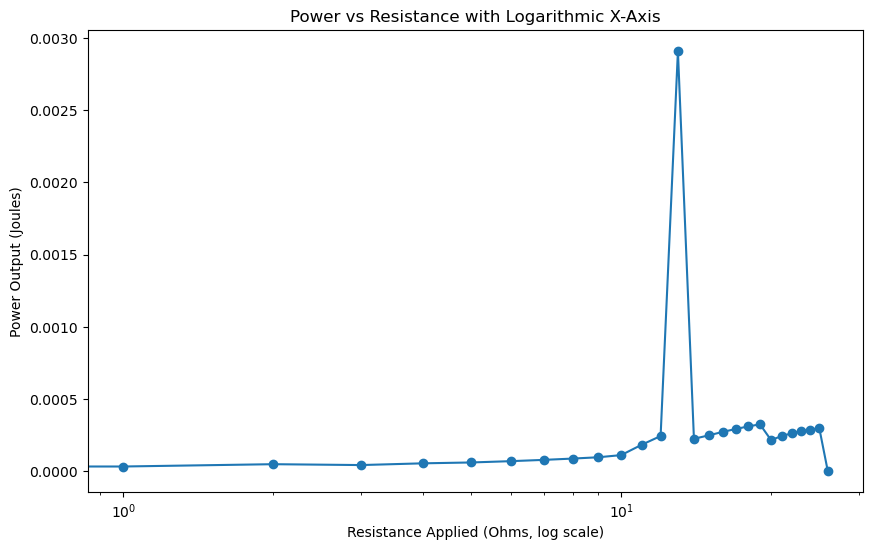

In [16]:
x1 = c1.R_ohms
y1 = c1.P_joules

R_vs_P(x1,y1)

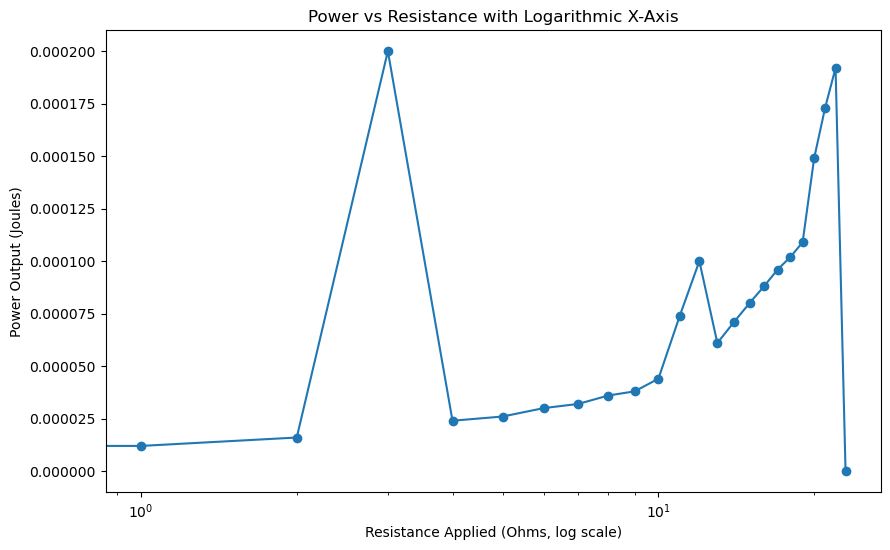

In [17]:
x3 = c3.R_ohms
y3 = c3.P_joules

R_vs_P(x3,y3)